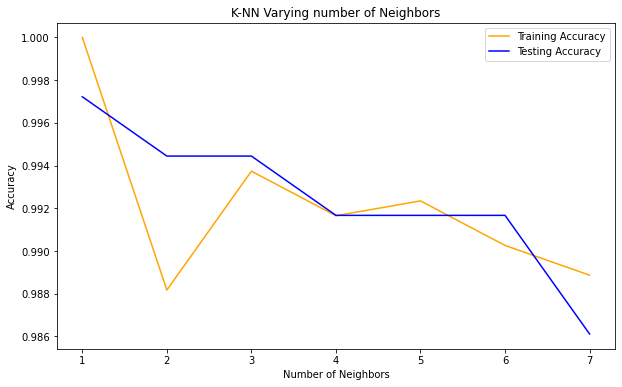

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

digits = datasets.load_digits()
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target
traindata=[]
testdata=[]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
for i in range(1,8):
	KNN=KNeighborsClassifier(n_neighbors=i)
	KNN.fit(x_train, y_train)
	traindata.append(KNN.score(x_train,y_train))
	testdata.append(KNN.score(x_test,y_test))
accKNN=KNN.score(x_train,y_train)    
plt.figure(figsize=(10,6))
plt.plot(range(1,8),traindata,color='orange', linestyle='solid', label="Training Accuracy")
plt.plot(range(1,8),testdata,color='blue', linestyle='solid', label="Testing Accuracy")
plt.title('K-NN Varying number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Text(0, 0.5, 'Error Rate')

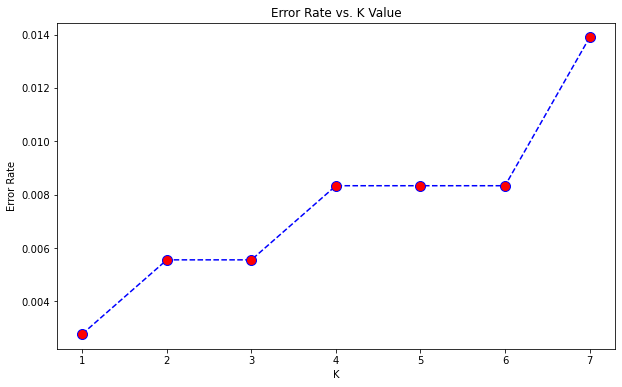

In [6]:
#Optimal K
error_rate = []
for i in range(1,8):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [7]:
#We may deduce from the estimated accuracy and error rate that the K at 1 is ideal because it has a high accuracy and a low error rate.

In [9]:
svm= SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
accSVM=svm.score(x_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      0.97      0.97        39
           2       1.00      1.00      1.00        38
           3       0.97      0.97      0.97        32
           4       0.97      0.97      0.97        40
           5       1.00      0.97      0.99        40
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        29
           8       0.94      0.94      0.94        33
           9       0.94      1.00      0.97        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [11]:
svm= SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.98        32
           4       1.00      0.97      0.99        40
           5       1.00      0.97      0.99        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        29
           8       0.97      1.00      0.99        33
           9       0.94      1.00      0.97        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [12]:
#Out of linear, poly, and RBF, linear is the most common. When there are a lot of characteristics, linear is the best kernel function because it is a one-dimensional function. The linear kernel is frequently prefered for text classification issues since most of these problems can be linearly split.
#Because it aids in data separation when no prior knowledge of the data is available, RBF is one of the most popular and often used kernel functions in SVM for non-linear data.

[Text(0.5, 60.0, 'Predicted label'), Text(123.0, 0.5, 'True label')]

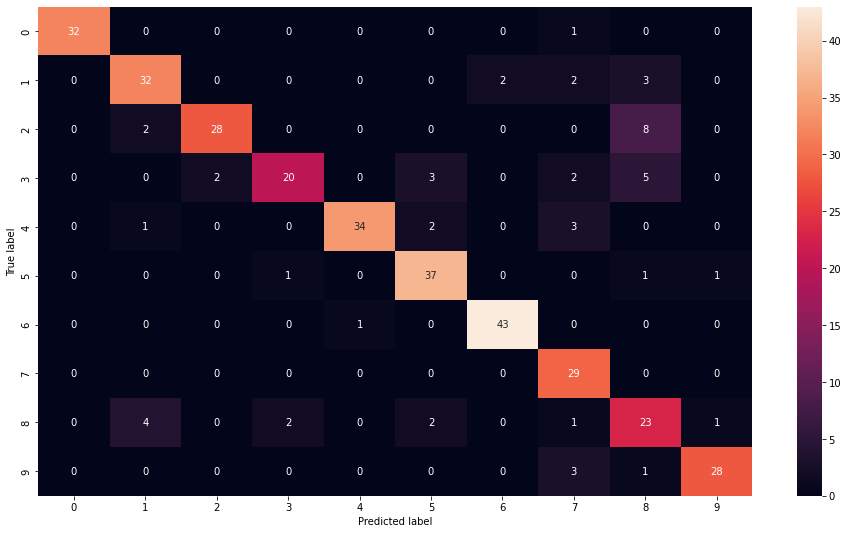

In [13]:
bayes = GaussianNB()
bayes.fit(x_train,y_train)
y_pred=bayes.predict(x_test)
accBayes=bayes.score(x_train,y_train)
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16,9))
ax = sns.heatmap(conf_matrix,annot=True)
ax.set(xlabel="Predicted label",
      ylabel="True label")

[0.988865692414753, 1.0, 0.8656924147529576]


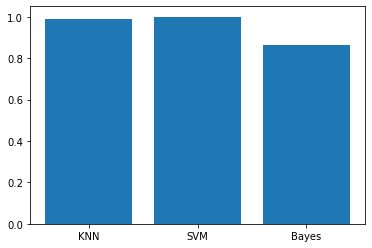

In [15]:
data=[accKNN, accSVM, accBayes]
print(data)
#plt.bar([0,0.5,1], data)
#plt.show()
x = np.arange(3)
fig, ax = plt.subplots()
plt.bar(x, data)
plt.xticks(x, ('KNN', 'SVM', 'Bayes'))
plt.show()

In [16]:
#We can see that SVM has a high level of accuracy. KNN is the most accurate. Because it presupposes that all features are independent, which is rarely the case, Bayes has the lowest accuracy rate. As a result, the naive bayes algorithm is less precise than more complex algorithms.

<AxesSubplot:>

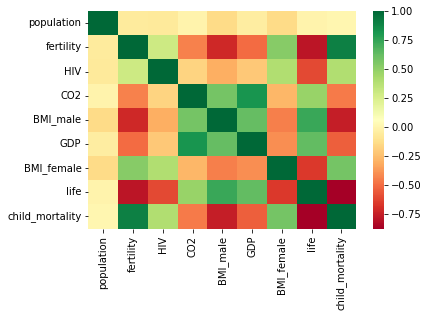

In [18]:
#GapMinder

df=pd.read_csv("gapminder.csv")
df.head()
sns.heatmap(df.corr(), cmap="RdYlGn")

0.6192442167740035


C:\Users\61481\AppData\Local\Temp/ipykernel_25152/3837548233.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:,None],y)
C:\Users\61481\AppData\Local\Temp/ipykernel_25152/3837548233.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None],y))
C:\Users\61481\AppData\Local\Temp/ipykernel_25152/3837548233.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x[:,None]), '-k')


Text(0, 0.5, 'Life Expectancy')

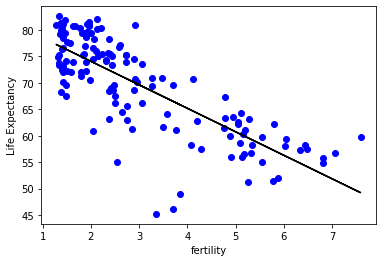

In [20]:
x=df["fertility"]
y=df["life"]
regression= LinearRegression()
regression.fit(x[:,None],y)
print(regression.score(x[:,None],y))
fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x[:,None]), '-k')
plt.xlabel('fertility')
plt.ylabel('Life Expectancy')

In [22]:
#5 cross validation for regression with fertility feature
cross_val_score(regression,x[:,None],y,cv=5)

C:\Users\61481\AppData\Local\Temp/ipykernel_25152/1125183871.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression,x[:,None],y,cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

0.8974995317332959


ValueError: too many values to unpack (expected 2)

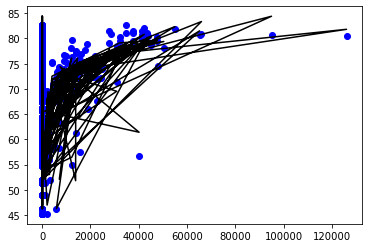

In [23]:
x=df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y=df["life"]
regression= LinearRegression()
regression.fit(x,y)
print(regression.score(x,y))
fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x), '-k')

In [24]:
#5 cross validation for regression with all features
cross_val_score(regression,x,y,cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

In [25]:
#When compared to data with only one feature, we can see that data with more features has a higher accuracy. This demonstrates the interdependence of the characteristics.

In [27]:
#Creditcard
df=pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


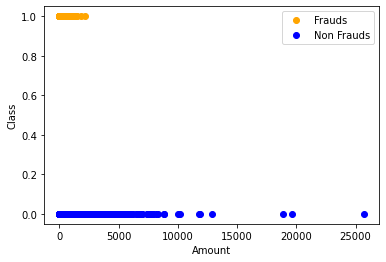

In [29]:
frauds=df.loc[df['Class']==1]
non_frauds= df.loc[df['Class']==0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label='Frauds')

plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label='Non Frauds')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

In [30]:
# We can notice that the number of fraudulent transactions has decreased. In addition, the total volume of fraudulent transactions is low.

C:\Users\61481\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[284156    159]
 [   151    341]]


C:\Users\61481\AppData\Local\Temp/ipykernel_25152/3274144917.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(Xlabel="Predicted label",


[Text(0.5, 15.0, 'Predicted label'), Text(33.0, 0.5, 'True label')]

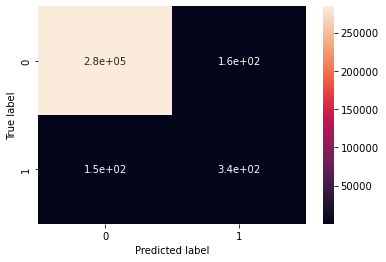

In [31]:
#logistic Regression
X = df.drop("Class", axis=1)
y = df.Class
log_regression = LogisticRegression()
log_regression.fit(X,y)
y_pred=log_regression.predict(X)
conf_matrix= confusion_matrix(y,y_pred)
print(conf_matrix)
ax=sns.heatmap(conf_matrix,annot=True)
ax.set(Xlabel="Predicted label",
      ylabel="True label")